<a href="https://colab.research.google.com/github/Deepak5j/StockPrediction/blob/master/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading YahooFinance Dataset

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

#AAPL: Apple Stocks Price
#yahoo: Data sources - Yahoo Finance (other like Google Finance, Enigma)
df = web.DataReader("AAPL", 'yahoo', start, end) 
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.727715
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275


# Rolling Mean and Return Rate of Stocks

## Rolling Mean (Moving Average) — to determine trend

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean() #window: days

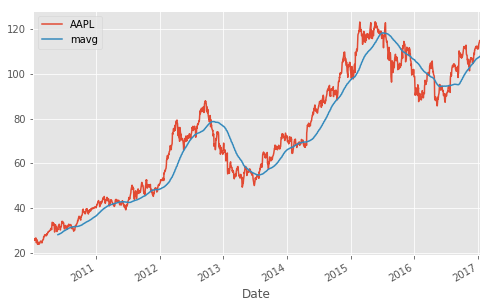

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 5))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Return Deviation — to determine risk and return
![gg](https://miro.medium.com/max/287/1*dx21tSoZSRX_YbDAgvR_JQ.png)

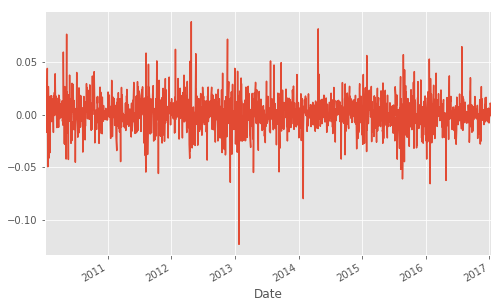

In [5]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

## Analysing your Competitors Stocks

In [6]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,26.681330,10.781219,312.204773,98.142967,24.443624
2010-01-05,26.727465,10.837044,310.829926,96.957375,24.451517
2010-01-06,26.302330,10.781219,302.994293,96.327530,24.301458
2010-01-07,26.253704,11.339470,295.940735,95.994110,24.048725
2010-01-08,26.428249,11.583703,299.885956,96.957375,24.214581
2010-01-11,26.195114,11.695356,299.432648,95.942223,23.906574
2010-01-12,25.897146,11.702333,294.137512,96.705429,23.748617
2010-01-13,26.262434,11.744200,292.448822,96.497971,23.969755
2010-01-14,26.110340,11.653484,293.823669,98.039223,24.451517


## Correlation Analysis — Does one competitor affect others?

In [7]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.381450,0.411693,0.383840,0.393467
GE,0.381450,1.000000,0.422249,0.535167,0.474091
GOOG,0.411693,0.422249,1.000000,0.403014,0.472083
IBM,0.383840,0.535167,0.403014,1.000000,0.496674
MSFT,0.393467,0.474091,0.472083,0.496674,1.000000


Text(0, 0.5, 'Returns GE')

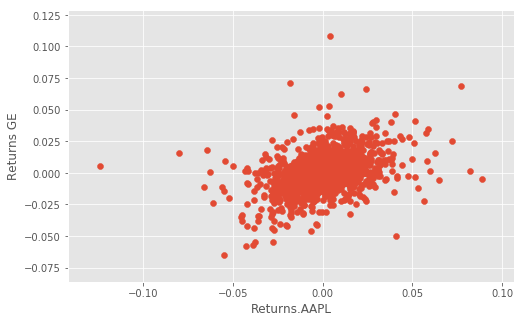

In [8]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns.AAPL')
plt.ylabel('Returns GE')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff188c6cc18>,
      dtype=object)

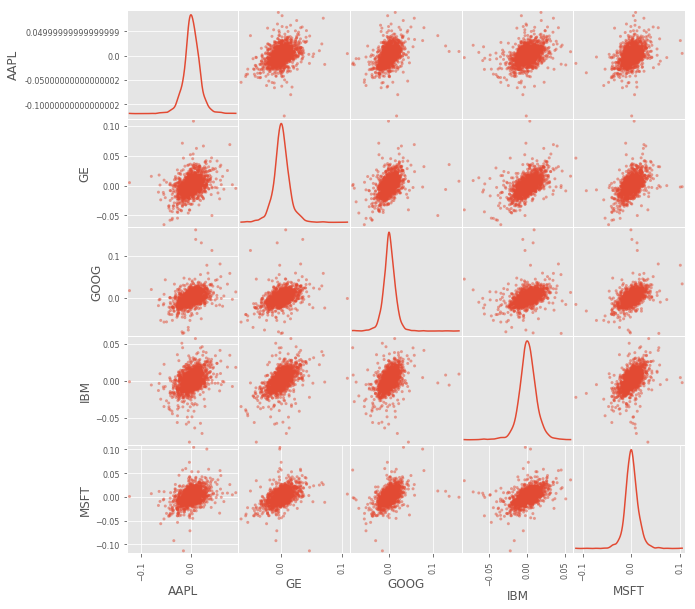

In [9]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))

([<matplotlib.axis.YTick at 0x7ff17c4a0898>,
 <a list of 5 Text yticklabel objects>)

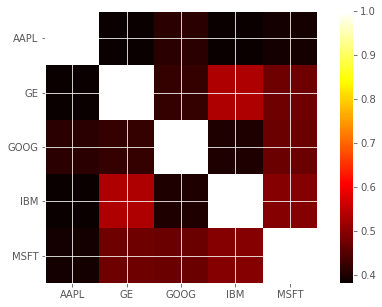

In [10]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

## Stocks Returns Rate and Risk

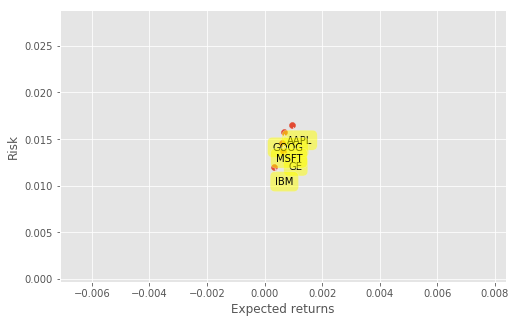

In [11]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Predicting Stocks Price

In [12]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864
2010-01-11,26.195114,115557400.0,2.165531,-1.264095
2010-01-12,25.897146,148614900.0,1.612746,-0.702707
2010-01-13,26.262434,151473000.0,3.242343,1.337373
2010-01-14,26.110340,108223500.0,0.687577,-0.323641


## Pre-processing & Cross Validation

In [0]:
import math
import numpy as np
from sklearn import preprocessing
# Drop missing value
dfreg.fillna(value=-99999, inplace=True) # We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]



# Model Generation

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [15]:
#df.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

# Lasso Regression
clflas = Lasso()
clflas.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
#Create confindence scores
confidencereg = clfreg.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)
confidencelas = clflas.score(X_test, y_test)

In [17]:
# results
print('The linear regression confidence is:',confidencereg*100)
print('The knn regression confidence is:',confidenceknn*100)
print('The lasso regression confidence is:',confidencelas*100)

The linear regression confidence is: 97.19574123804554
The knn regression confidence is: 94.41955548813696
The lasso regression confidence is: 96.98802463094977


In [18]:
#Create new columns
forecast_reg = clfreg.predict(X_test)
forecast_knn = clfknn.predict(X_test)
forecast_las = clflas.predict(X_test)
print('1#',X_test)
print('2#',forecast_reg)
print('3#',forecast_knn)
print('4#',forecast_las)

1# [[-0.69860293 -0.07697317  0.56464752 -0.42439615]
 [-0.09547779 -0.25775205  0.34277939 -1.00168126]
 [ 1.72891885 -0.80032118 -0.14863176  0.81915927]
 ...
 [ 1.64864816 -0.82862118 -0.65318193 -0.52504838]
 [ 1.58285222 -1.02535939 -0.71677996  0.19090895]
 [-1.48745442  1.86419977  1.63444396  0.9915626 ]]
2# [ 55.46479401  71.38584237 119.12133561  64.88020987  70.13128437
  41.55772076  80.02627883  34.19257629 103.11633496  35.55221996
  64.75069373  31.33967882  69.53252359  75.75532607  76.07845078
  95.26512581  37.22311977  62.62500269 100.35346274 101.24432647
  64.1488356   69.99448194  67.51657305  74.23845007  67.6135027
  95.8181987  108.61402677 104.91195407  27.64409551  49.33687156
  71.85265761  67.94735663  59.32323377 108.84232818  49.15252743
  96.02020391  60.02282638 103.90195992  63.89103043 119.67878139
  45.42593956 118.52020072  42.90698604 109.51731508  44.33389794
 117.05096577  39.19043611  35.3568251   64.05510858  48.77873586
  45.43272245  56.45213

In [19]:
dfreg['Forecast_reg'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)


#Process all new columns data
dfreg['Forecast_reg'] = np.nan

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_reg:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns))]
    dfreg['Forecast_reg'].loc[next_date] = i

    
dfreg['Forecast_knn'] = np.nan

last_date = dfreg.iloc[-26].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_knn:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg['Forecast_knn'].loc[next_date] = i  
    
dfreg['Forecast_las'] = np.nan

last_date = dfreg.iloc[-26].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_las:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg['Forecast_las'].loc[next_date] = i

#print(dfreg.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')))

#print(dfreg['Adj Close'].to_list())
print(dfreg.head)
#print(dfreg['Forecast_reg'].to_list())
#dfreg['Forecast_knn'].to_list()
#dfreg['Forecast_las'].to_list()

<bound method NDFrame.head of             Adj Close       Volume  ...  Forecast_knn  Forecast_las
Date                                ...                            
2010-01-04  26.681330  123432400.0  ...           NaN           NaN
2010-01-05  26.727465  150476200.0  ...           NaN           NaN
2010-01-06  26.302330  138040000.0  ...           NaN           NaN
2010-01-07  26.253704  119282800.0  ...           NaN           NaN
2010-01-08  26.428249  111902700.0  ...           NaN           NaN
2010-01-11  26.195114  115557400.0  ...           NaN           NaN
2010-01-12  25.897146  148614900.0  ...           NaN           NaN
2010-01-13  26.262434  151473000.0  ...           NaN           NaN
2010-01-14  26.110340  108223500.0  ...           NaN           NaN
2010-01-15  25.673977  148516900.0  ...           NaN           NaN
2010-01-19  26.809748  182501900.0  ...           NaN           NaN
2010-01-20  26.397085  153038200.0  ...           NaN           NaN
2010-01-21  25.940